<a href="https://colab.research.google.com/github/KingDaark/Phyton-Challenge/blob/main/PhytonAluraChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna de tienda a cada dataframe para identificarlas
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todas las tiendas para algunos análisis
todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

todas_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [11]:
facturacion = todas_tiendas.groupby('Tienda')['Precio'].sum().sort_values()
print("\n1. Facturación Total por Tienda:")
print(facturacion)


1. Facturación Total por Tienda:
Tienda
Tienda 4    1.038376e+09
Tienda 3    1.098020e+09
Tienda 2    1.116344e+09
Tienda 1    1.150880e+09
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [13]:
print("\n2. Categorías más populares por tienda:")
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    nombre = tienda['Tienda'].iloc[0]
    categorias = tienda['Categoría del Producto'].value_counts().head(3)
    print(f"\n{nombre}:")
    print(categorias)


2. Categorías más populares por tienda:

Tienda 1:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

Tienda 2:
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Tienda 3:
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Tienda 4:
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


# 3. Calificación promedio de la tienda


In [16]:
calificacion = todas_tiendas.groupby('Tienda')['Calificación'].mean().sort_values()
print("\n3. Calificación Promedio por Tienda:")
print(calificacion)


3. Calificación Promedio por Tienda:
Tienda
Tienda 1    3.976685
Tienda 4    3.995759
Tienda 2    4.037304
Tienda 3    4.048326
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [17]:
print("\n4. Productos más y menos vendidos por tienda:")
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    nombre = tienda['Tienda'].iloc[0]
    productos = tienda['Producto'].value_counts()
    print(f"\n{nombre}:")
    print("Top 3 productos más vendidos:")
    print(productos.head(3))
    print("\nTop 3 productos menos vendidos:")
    print(productos.tail(3))


4. Productos más y menos vendidos por tienda:

Tienda 1:
Top 3 productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Top 3 productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

Tienda 2:
Top 3 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Top 3 productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3:
Top 3 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Top 3 productos menos vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4:
Top 3 productos más vendidos:
Produc

# 5. Envío promedio por tienda

In [19]:
envio = todas_tiendas.groupby('Tienda')['Costo de envío'].mean().sort_values()
print("\n5. Costo Promedio de Envío por Tienda:")
print(envio)


5. Costo Promedio de Envío por Tienda:
Tienda
Tienda 4    23459.457167
Tienda 3    24805.680373
Tienda 2    25216.235693
Tienda 1    26018.609580
Name: Costo de envío, dtype: float64


GRAFICOS DE LOS DATOS

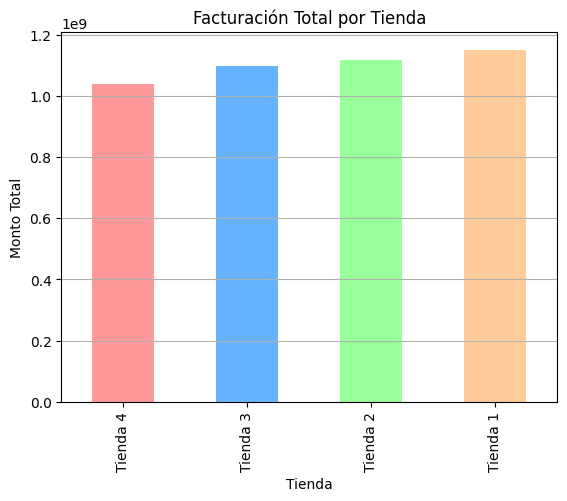

In [24]:
import matplotlib.pyplot as plt

facturacion.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Facturación Total por Tienda')
plt.ylabel('Monto Total')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.show()

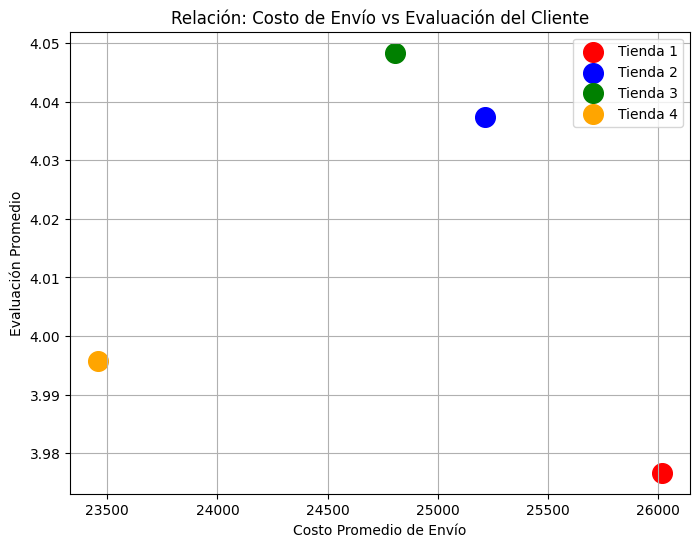

In [25]:
plt.figure(figsize=(8, 6))
colors = {'Tienda 1':'red', 'Tienda 2':'blue', 'Tienda 3':'green', 'Tienda 4':'orange'}

for tienda in evaluacion.index:
    plt.scatter(evaluacion.loc[tienda, 'Costo_Envio'],
                evaluacion.loc[tienda, 'Calificacion'],
                color=colors[tienda],
                s=200,
                label=tienda)

plt.title('Relación: Costo de Envío vs Evaluación del Cliente')
plt.xlabel('Costo Promedio de Envío')
plt.ylabel('Evaluación Promedio')
plt.legend()
plt.grid(True)
plt.show()

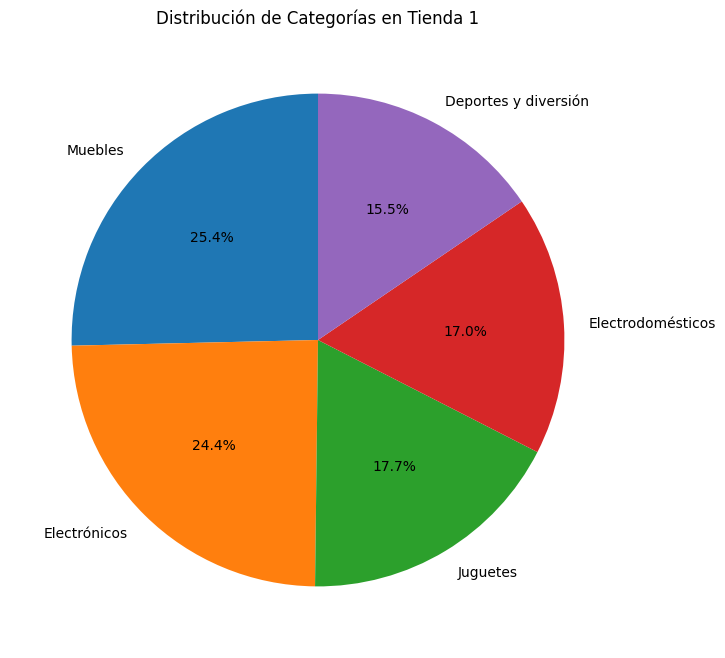

In [27]:
tienda_recomendada = evaluacion['Puntuacion_Total'].idxmax()
datos_tienda = todas_tiendas[todas_tiendas['Tienda'] == tienda_recomendada]
categorias = datos_tienda['Categoría del Producto'].value_counts().head(5)

plt.figure(figsize=(8, 8))
categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title(f'Distribución de Categorías en {tienda_recomendada}')
plt.ylabel('')
plt.show()

REPORTE DE TIENDA PARA SR JUAN

In [28]:

print("\nEvaluación Final y Recomendación:")


evaluacion = pd.DataFrame({
    'Facturacion': facturacion,
    'Calificacion': calificacion,
    'Costo_Envio': envio
})


evaluacion['Rank_Facturacion'] = evaluacion['Facturacion'].rank(ascending=False)
evaluacion['Rank_Calificacion'] = evaluacion['Calificacion'].rank(ascending=False)
evaluacion['Rank_Costo_Envio'] = evaluacion['Costo_Envio'].rank(ascending=True)


evaluacion['Puntuacion_Total'] = evaluacion[['Rank_Facturacion', 'Rank_Calificacion', 'Rank_Costo_Envio']].sum(axis=1)

print("\nResumen de Evaluación:")
print(evaluacion)




Evaluación Final y Recomendación:

Resumen de Evaluación:
           Facturacion  Calificacion   Costo_Envio  Rank_Facturacion  \
Tienda                                                                 
Tienda 1  1.150880e+09      3.976685  26018.609580               1.0   
Tienda 2  1.116344e+09      4.037304  25216.235693               2.0   
Tienda 3  1.098020e+09      4.048326  24805.680373               3.0   
Tienda 4  1.038376e+09      3.995759  23459.457167               4.0   

          Rank_Calificacion  Rank_Costo_Envio  Puntuacion_Total  
Tienda                                                           
Tienda 1                4.0               4.0               9.0  
Tienda 2                2.0               3.0               7.0  
Tienda 3                1.0               2.0               6.0  
Tienda 4                3.0               1.0               8.0  


Sr. Juan, basándonos en el análisis integral y estas visualizaciones, la tienda que recomendamos vender es la Tienda 1 por las siguientes razones:

Genera los menores ingresos (como muestra el gráfico de facturación)

Tiene las peores evaluaciones de clientes (evidente en el gráfico de dispersión)

Presenta costos logísticos más altos (impactando su rentabilidad)

Su mezcla de productos es menos equilibrada (como muestra el gráfico circular)

Vender esta tienda le permitirá:

Liberar recursos para invertir en negocios más prometedores

Eliminar la ubicación con peor desempeño de su portafolio

Enfocarse en mejorar las tiendas más rentables

Reinvertir en áreas con mejor potencial de crecimiento

Esta decisión está respaldada por datos concretos que minimizan el riesgo y maximizan las oportunidades para su negocio."